In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [3]:
import re
from datetime import timedelta
def parse_line(filename):
    with open(filename) as f:
        file = f.read()
        
    stats_regex = "\[(?P<epoch>[0-9]+)\] - (.*) - (\d+\.\d+),(\d+\.\d+),(\d+\.\d+)"
    stats_regex = re.compile(stats_regex)
    stats_match = stats_regex.findall(file)
    
    time_regex = "\[([0-9]+)\] - (.*) - (\d\:\d+\:\d+\.\d+)"
    time_regex = re.compile(time_regex)
    times = time_regex.findall(file)
    
    stats = [(int(x[0]), x[1], float(x[2]), float(x[3]), float(x[4])) for x in stats_match]
    #time_matches = [(int(x[0]), x[1], float(x[2]), float(x[3])) for x in stats_match]
    
    train_stats = [x for x in stats if "train" in x[1]]
    train_times = [x for x in times if "train" in x[1]]
    
    eval_stats = [x for x in stats if "eval" in x[1]]
    eval_times = [x for x in times if "eval" in x[1]]

    return train_stats, train_times, eval_stats, eval_times

In [4]:
def plot_results(filename, stat: str = "loss"):
    stat_map = {"loss":2, "top1":3, "top5": 4}
    index = stat_map.get(stat,2)
    train_stats, train_times, eval_stats, eval_times= parse_line(filename)
    
    plt.plot([x[0] for x in train_stats][2:], np.convolve([x[3] for x in train_stats], np.ones(3)/3, mode='valid'))
    plt.plot([x[0] for x in eval_stats][2:], np.convolve([x[3] for x in eval_stats], np.ones(3)/3, mode='valid'))
    plt.grid(True)
    plt.title(filename)
    plt.xlabel("Epoch")
    plt.ylabel("Top1 Accuracy")
    plt.show()

In [5]:
from datetime import datetime


def parse_dur(string):
    return datetime.strptime(string, "%H:%M:%S.%f") - datetime.strptime("00:00:00.000000", "%H:%M:%S.%f")

In [6]:
def get_time_taken(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    data = {}
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        total_train_times = [parse_dur(x[2]) for x in train_times]
        total_eval_times = [parse_dur(x[2]) for x in eval_times]
        total_duration = timedelta()
        eval_duration = timedelta()
        train_duration = timedelta()
        for dur in total_train_times:
            total_duration += dur
            train_duration += dur
        for dur in total_eval_times:
            total_duration += dur
            eval_duration += dur
        data[os.path.split(root)[-1]]= (total_duration, train_duration, eval_duration, len(total_train_times), len(total_eval_times))
    return data        

In [7]:
def plt_multiple(folder):
    files= [os.path.join(root, file) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key=os.path.getmtime)
    for file in files:
        plot_results(file)

def print_results(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    data = {}
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        max_acc = train_stats[0]
        if len(eval_stats) > 0:
            max_acc = max(eval_stats, key=lambda x:x[3])
        #print(f"{os.path.split(root)[-1]:<30} {max_acc[3]}")
        data[os.path.split(root)[-1]]=max_acc[3]
    return data

def parse_name(name):
    parts = name.split("_")
    window = int(parts[1])
    samples = int(parts[2])
    return window, samples

In [8]:
folder = "/media/barny/SSD4/MasterThesis/Data/logs/2pgcn/"
files = [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file.startswith(("1","2","3","4","5"))]
for root, file in files:
    #print(root,os.path.split(file)[-1])
    pass

stgcn_jo-jomo-jore_ntu_xsub    0.9114    1
stgcn_jo-an-jore_ntu_xsub      0.9109    1
stgcn_jo-an-bomo_ntu_xsub      0.9100    1
stgcn_jo-jore-boac_ntu_xsub    0.9099    1
stgcn_jo-jore-bomo_ntu_xsub    0.9085    1
stgcn_jo-jore-joac_ntu_xsub    0.9084    1
stgcn_jo-jore-bo_ntu_xsub      0.9083    1
stgcn_jo-an-bo_ntu_xsub        0.9082    1
stgcn_jo-jore-boan_ntu_xsub    0.9078    1
stgcn_jo-an-joac_ntu_xsub      0.9056    1
stgcn_jo-jomo-boac_ntu_xsub    0.9051    1
stgcn_jo-jomo-an_ntu_xsub      0.9048    1
stgcn_jo-jomo-joac_ntu_xsub    0.9045    1
stgcn_jo-jomo-bo_ntu_xsub      0.9045    1
stgcn_jo-jomo-bomo_ntu_xsub    0.9043    1
stgcn_jo-an-boac_ntu_xsub      0.9018    1
stgcn_jo-an-boan_ntu_xsub      0.8993    1
stgcn_jo-jomo-boan_ntu_xsub    0.8971    1
stgcn_jo-joac-bo_ntu_xsub      0.8926    1


In [29]:
print_results("./logs/augment_test")

{'xview_joints_none': 0.9562236286919831,
 'xview_joints_mean_spine': 0.9675105485232067,
 'xview_joints_spine': 0.9580168776371308,
 'xview_joints_screen': 0.9691983122362869,
 'xview_joints_relative': 0.9556962025316456,
 'xview_joints_spine_align': 0.9622890295358649,
 'xview_joints_mean_spine_align': 0.9608122362869198}

In [32]:
from collections import defaultdict

data = [print_results("./logs/norm_tests2"),print_results("./logs/norm_tests3")]
avg = defaultdict(list)
for d in data:
    for k,v in d.items():
        avg[k].append(v)
avg = sorted([(k,np.mean(v)) for k,v in avg.items()], key=lambda x:np.mean(x[1]))
print(avg)

[('xsub_joints_relative', 0.8606582125603865), ('xsub_joints_mean_spine', 0.8723429951690821), ('xsub_joints_spine', 0.8754830917874397), ('xsub_joints_screen', 0.88118961352657), ('xsub_joints_none', 0.8848429951690822), ('xsub_joints_mean_spine_align', 0.9030797101449275), ('xsub_joints_spine_align', 0.9042874396135265)]


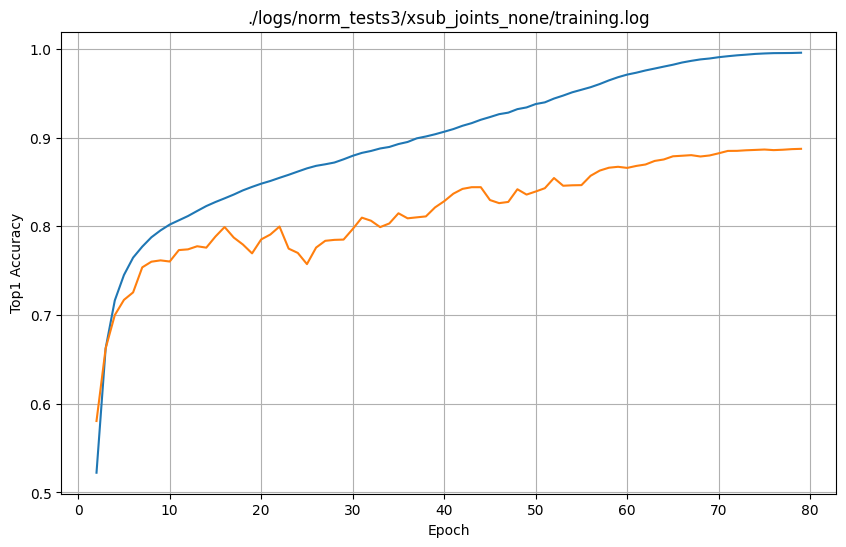

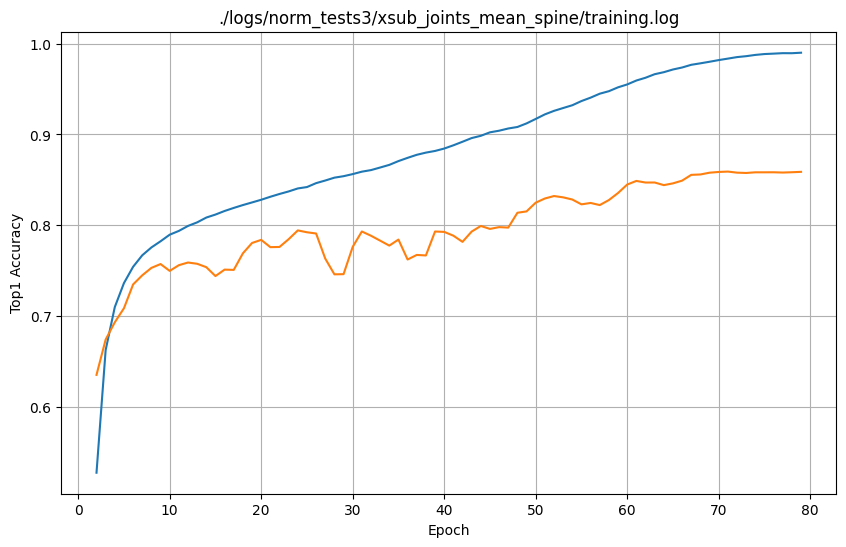

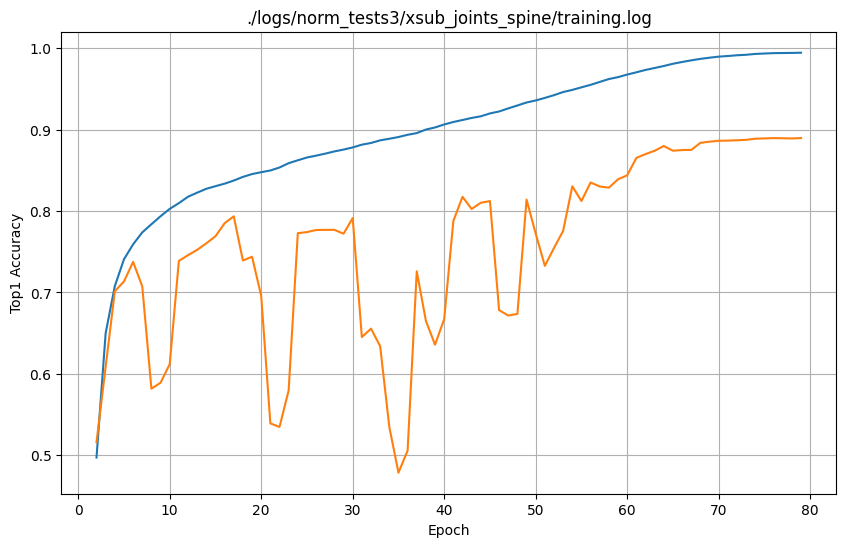

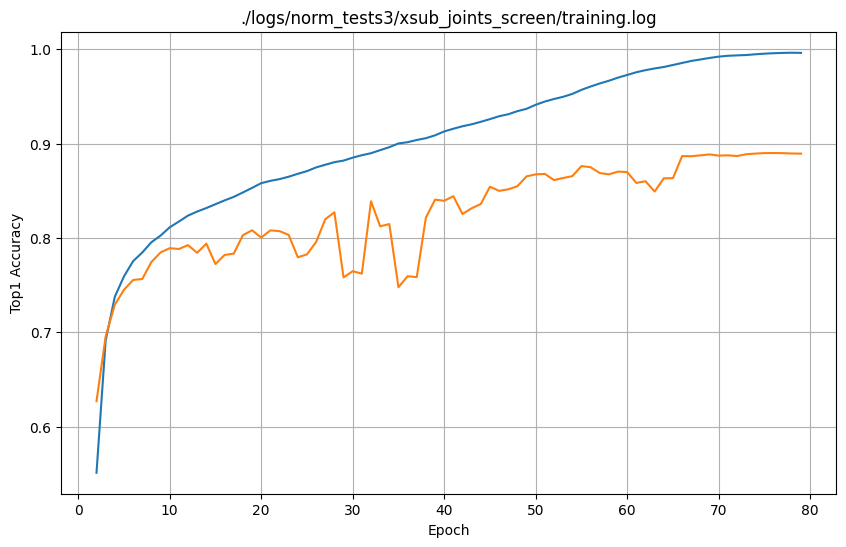

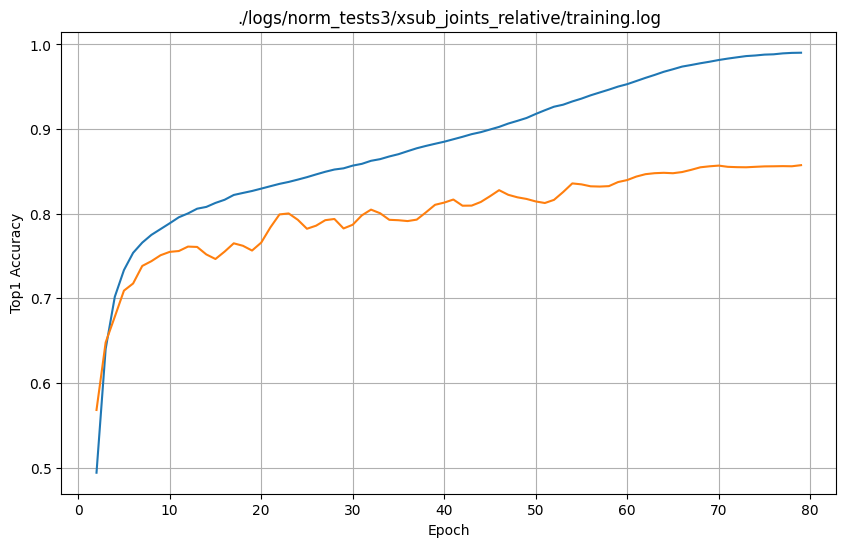

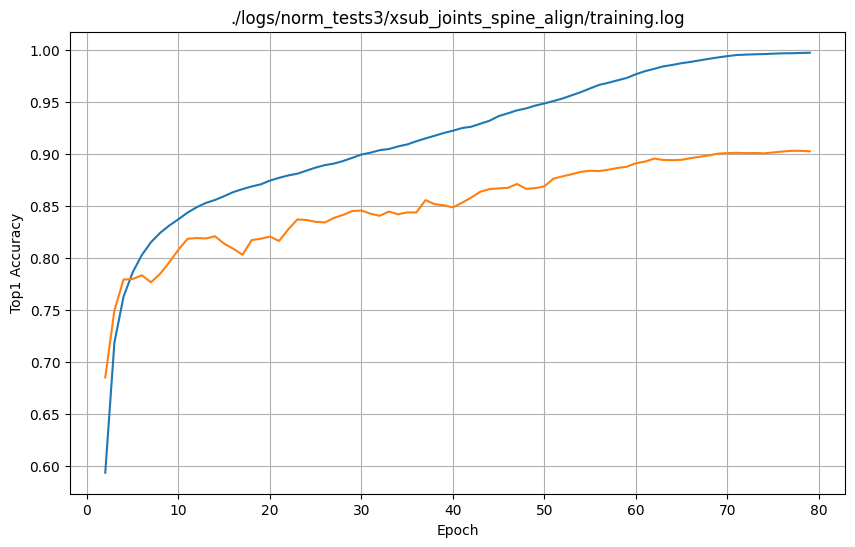

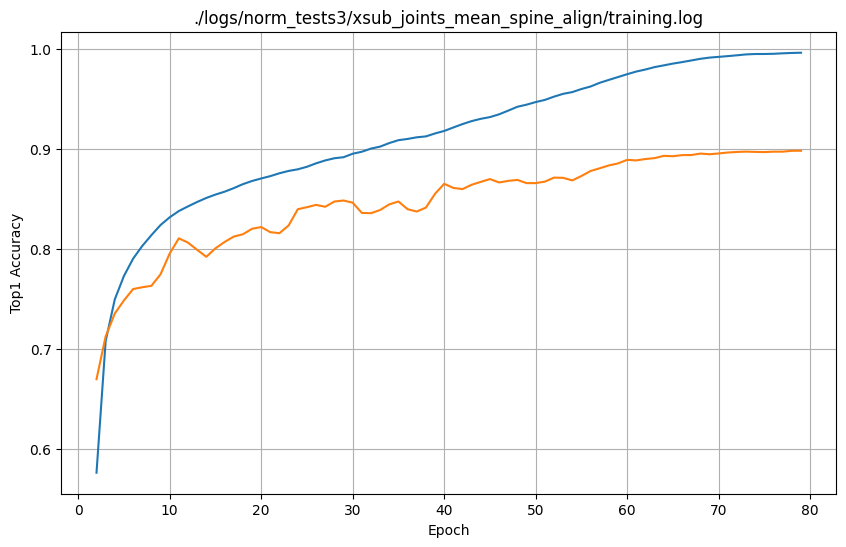

In [25]:
plt_multiple("./logs/norm_tests3")

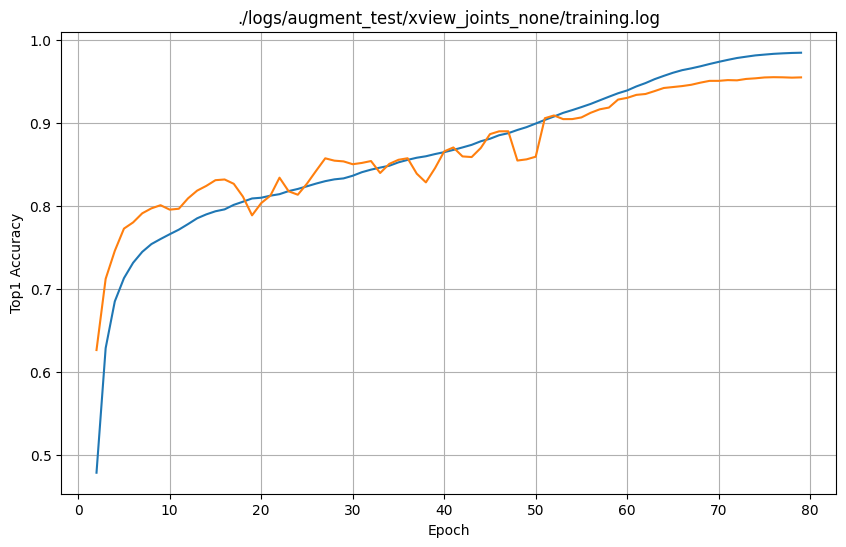

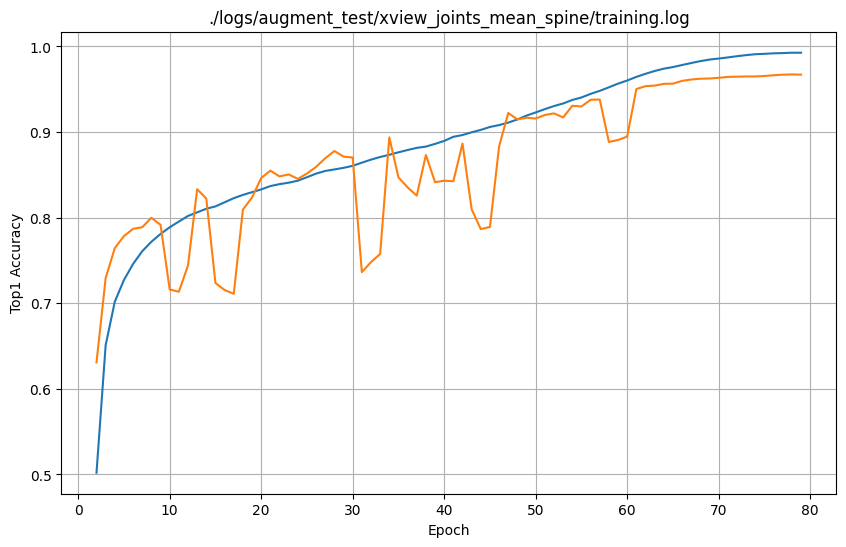

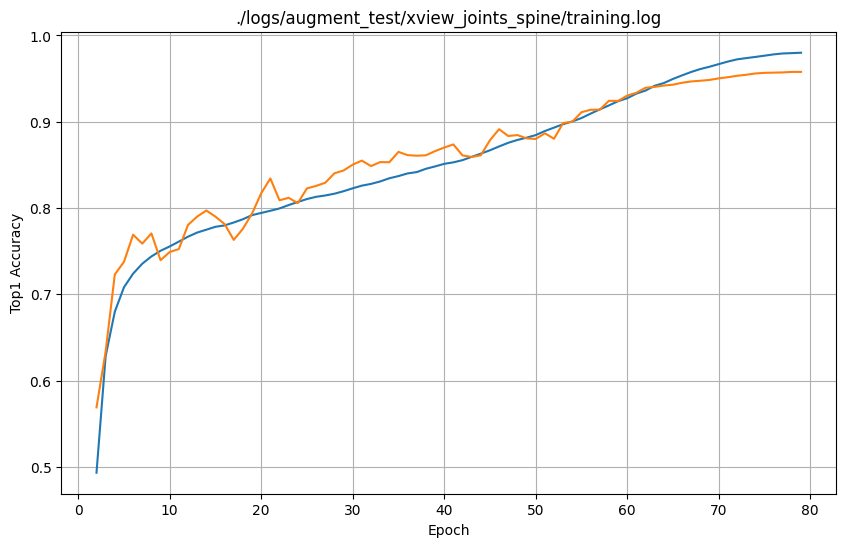

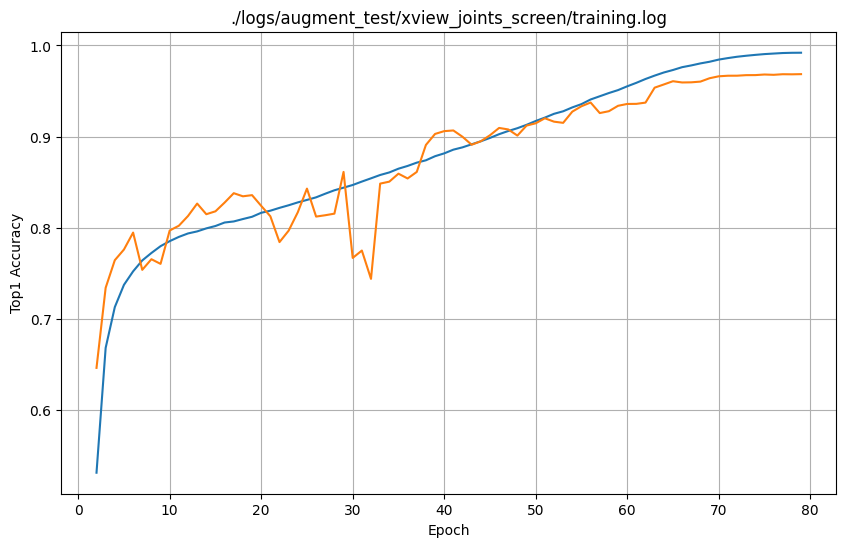

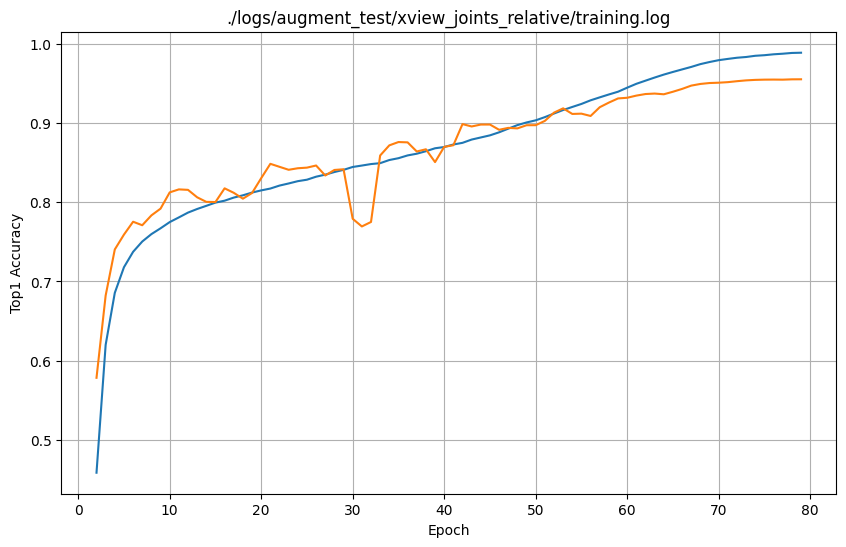

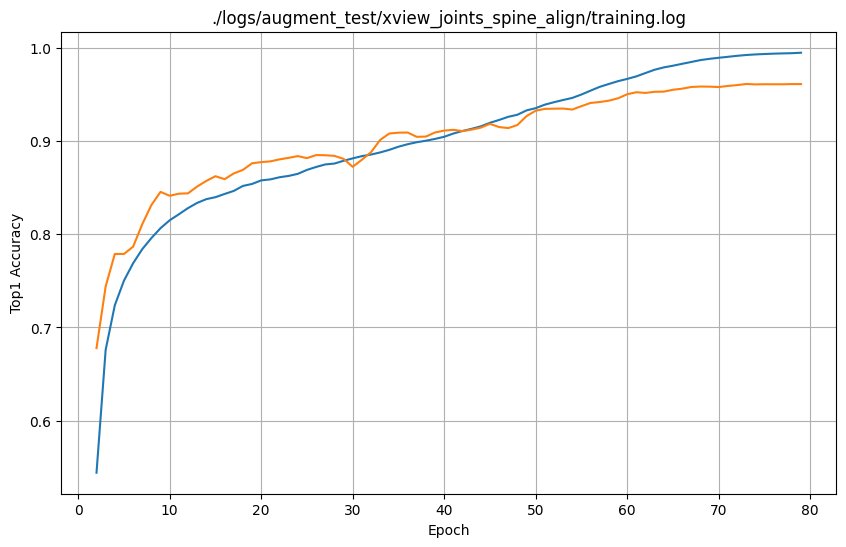

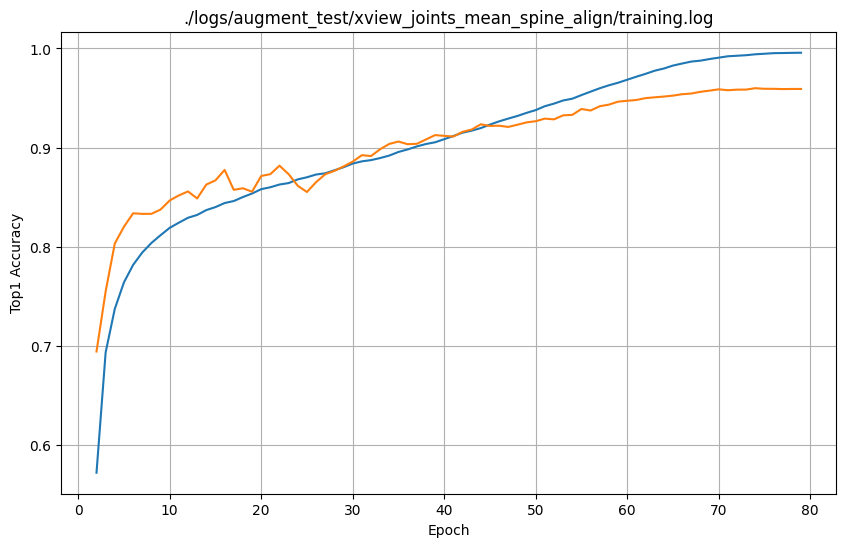

In [10]:
plt_multiple("./logs/augment_test")